### Khái niệm
- Nhiễu là các pixel gây xáo trộn nội dung ảnh (mờ / chi tiết xoá trộn). 
- Có thể giả lập nhiễu để thêm vào ảnh nhờ các phân bố xác suất.
Các mô hình nhiễu
### Các mô hình nhiễu
#### Gaussian noise
Phân bố Gaussian là phân bố chuẩn, tương đối chính xác với các thông tin, các quy luật trong thực tế
Các loại nhiễu mà phần bố tuân theo hàm mật độ xác suất Gaussian
#### Gamma noise
#### GMM
### HMM

Nhờ các mô hình nhiễu mà người ta tính được các nhiễu trong ảnh. Nhờ tính được các nhiễu này mà xoá được các nhiễu khỏi ảnh

Trong thực tế, không thể tính được mô hình nhiễu vì mất nhiều thời gian để tính toán. Vì thế cần tới phương pháp giảm nhiễu bằng bộ lọc
- Lọc trên miền không gian (Spatial) - Ảnh gốc
    + Lọc tuyến tính: Lấy giá trị xung quanh để tính giá trị điểm giữa trên 1 mặt nạ lọc - Kernel (Ma trận 3x3 chẳn hạn): Blur / GaussianBlur
    + Lọc phi tuyến tính: Không dùng các giá trị trị xung quanh: Median, Min, Max, Mode, Q1,Q2(Median),Q3 của tứ phân vị (Quartiles)
- Lọc trên miền tần số (Frequency) - Ảnh xử lý bằng cách đếm tần số xuất hiện của điểm ảnh
    + Lọc các điểm có tần số cao: HiPass Filter
    + Lọc các điểm có tần số thấp: LowPass Filter

### Tác dụng:
- Nâng cấp chất lượng ảnh
    + Làm các chi tiết nổi bật hơn
    + Làm ảnh mờ hơn (giảm nhiễu)

### Mặt nạ - Kernel
Dùng để xử lý ảnh bằng cách áp mặt nạ (ma trận 3x3 chẳn hạn). Giá trị cường độ sáng của điểm ảnh tại tâm kernel được tính bằng trung bình của tổng tất cả các điểm ảnh được áp mặt nạ nhân với giá trị trên tương ứng trên mặt nạ (Convolution)

### Bài tập
Viết Function thay cho 2 hàm Bur và GaussianBlur -> Nộp qua Zalo cho thầy.

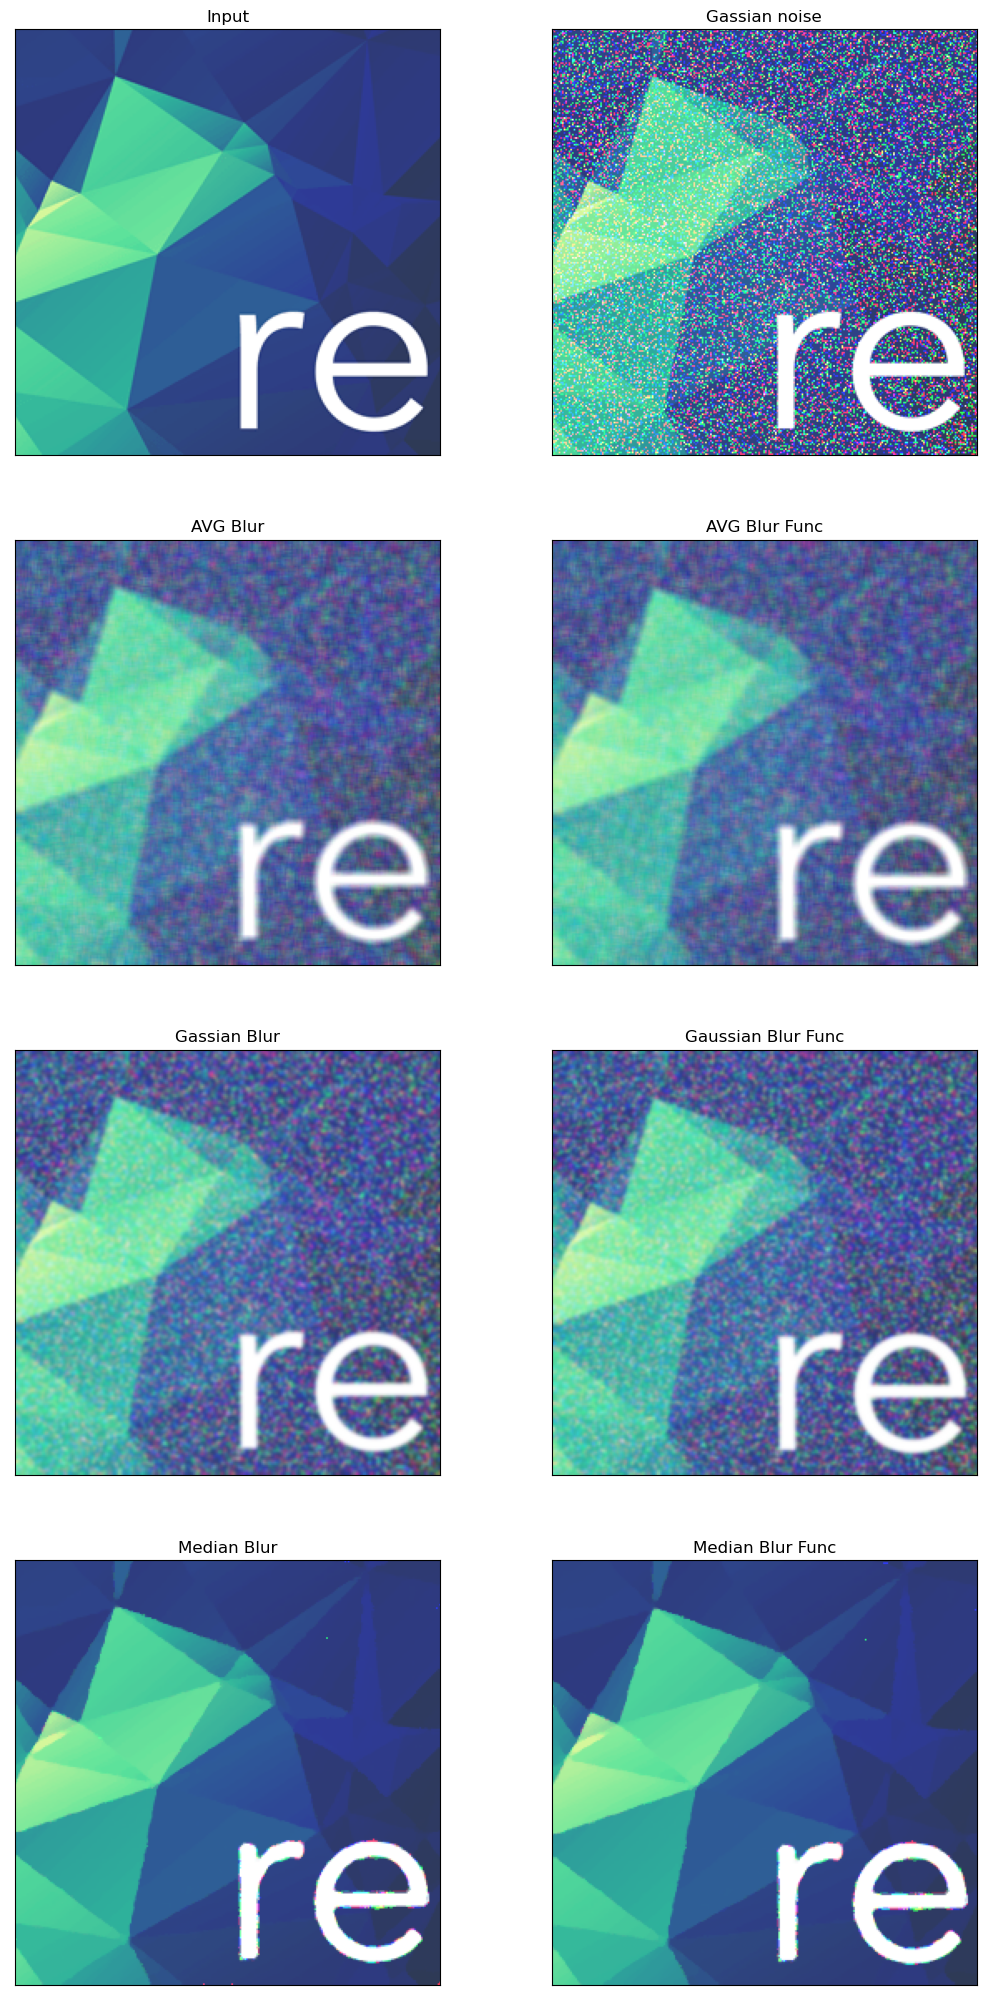

In [43]:
from tabnanny import check
from unittest import result
from matplotlib import pyplot as plt
import cv2
import numpy as np
from scipy import signal

def Show(pos, image, name, gray=False, hideTisks=False):
    plt.subplot(pos)
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(name)
    if hideTisks:
        plt.xticks([]), plt.yticks([])

def CalcCenterMedian(img, kernelSize, x, y):
    (B, G, R, size) = ([], [], [], 0)
    for i in range(kernelSize):
        for j in range(kernelSize):
            x1 = x - (kernelSize+1) // 2 + i
            y1 = y - (kernelSize+1) // 2 + j
            if x1 >= 0 and x1 < img.shape[0] and y1 >= 0 and y1 < img.shape[1]:
                B.append(img[x1, y1][0])
                G.append(img[x1, y1][1])
                R.append(img[x1, y1][2])
                size += 1
    B.sort(), G.sort(), R.sort()
    mid = size//2
    return (B[mid], G[mid], R[mid])

def Medianblur(img, kernelSize):
    result = img.copy()
    (height, width, channel) = img.shape
    for i in range(height):
        for j in range(width):
            result[i, j] = CalcCenterMedian(img,kernelSize,i,j)
    return result

def CalcCenter(img, kernel, kernelSize, x, y):
    (B, G, R, total) = (0, 0, 0, 0)
    for i in range(kernelSize):
        for j in range(kernelSize):
            x1 = x - (kernelSize+1) // 2 + i
            y1 = y - (kernelSize+1) // 2 + j
            if x1 >= 0 and x1 < img.shape[0] and y1 >= 0 and y1 < img.shape[1]:
                B += img[x1, y1][0] * kernel[i, j]
                G += img[x1, y1][1] * kernel[i, j]
                R += img[x1, y1][2] * kernel[i, j]
                total += kernel[i, j]
    return (B//total, G//total, R//total)

def ApplyKernel(img, kernel, kernelSize):
    result = img.copy()
    (height, width, channel) = img.shape
    for i in range(height):
        for j in range(width):
            result[i, j] = CalcCenter(img,kernel,kernelSize,i,j)
    return result

def GaussianBlur(img, kernelSize, sigmaX):
    gkern1d = signal.gaussian(kernelSize, std=sigmaX).reshape(kernelSize, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return ApplyKernel(img, gkern2d, kernelSize)

def AverageBlur(img, kernelSize):
    kern2d = np.ones((kernelSize, kernelSize))
    return ApplyKernel(img, kern2d, kernelSize)

image = cv2.imread('image\icon.png', cv2.IMREAD_COLOR)
(w, h, c) = image.shape
dst = image[160:250, 130:250]
# Tạo nhiễu Gaussian
# Hàm normal để tạo phân bố chuẩn 
#(đồ thị phương trình được điều chỉnh theo phương sai u=0 (đối xứng qua Oy) và độ lệch chuẩn o=1)
gauss = np.random.normal(0,1,image.size)
gauss = gauss.reshape(w,h,c).astype('uint8')
# Thêm nhiễu vào ảnh
image_gauss = cv2.add(image, gauss)
# Khử nhiễu dùng Average Filter
AGV_blur = cv2.blur(image_gauss, (5, 5))
# Khử nhiễu dùng Gaussian Filter
Gaussian_blur = cv2.GaussianBlur(image_gauss, (5,5), 0) 
# Khử nhiễu dùng Medium Filter
Median_blur = cv2.medianBlur(image_gauss, 5, 0) 
# Hiển thị
fig = plt.gcf()
fig.set_size_inches(5 * 2.54, 10 * 2.54)
Show(421, image, "Input", False, True)
Show(422, image_gauss, "Gassian noise", False, True)
Show(423, AGV_blur, "AVG Blur", False, True)
Show(424, AverageBlur(image_gauss, 5), "AVG Blur Func", False, True)
Show(425, Gaussian_blur, "Gassian Blur", False, True)
Show(426, GaussianBlur(image_gauss, 5, 1), "Gaussian Blur Func", False, True)
Show(427, Median_blur, "Median Blur", False, True)
Show(428, Medianblur(image_gauss, 5), "Median Blur Func", False, True)
plt.show()